In [1]:
#pip list

import os
# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
os.getcwd()
os.listdir()

['.gitignore',
 '.ipynb_checkpoints',
 '01_the_machine_learning_landscape.ipynb',
 '02_end_to_end_machine_learning_project.ipynb',
 '03_classification.ipynb',
 '04_training_linear_models.ipynb',
 '05_support_vector_machines.ipynb',
 '06_decision_trees.ipynb',
 '07_ensemble_learning_and_random_forests.ipynb',
 '08_dimensionality_reduction.ipynb',
 '09_unsupervised_learning.ipynb',
 '10_neural_nets_with_keras.ipynb',
 '11_training_deep_neural_networks.ipynb',
 '12_custom_models_and_training_with_tensorflow.ipynb',
 '13_loading_and_preprocessing_data.ipynb',
 '14_deep_computer_vision_with_cnns.ipynb',
 '15_processing_sequences_using_rnns_and_cnns.ipynb',
 '16_nlp_with_rnns_and_attention.ipynb',
 '17_autoencoders_and_gans.ipynb',
 '18_reinforcement_learning.ipynb',
 '19_training_and_deploying_at_scale.ipynb',
 'apt.txt',
 'book_equations.ipynb',
 'book_equations.pdf',
 'changes_in_2nd_edition.md',
 'checkpoint',
 'cover.png',
 'custom_model_in_keras.ipynb',
 'datasets',
 'docker',
 'enviro

In [3]:
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# get the data
filname = 'C:/Users/BIT/Jupyter Notebook/handson-ml2-master/fer2013.csv'
label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
names=['emotion','pixels','usage']
df=pd.read_csv('C:/Users/BIT/Jupyter Notebook/handson-ml2-master/fer2013.csv',names=names, na_filter=False)
im=df['pixels']
df.head(10)

,emotion,pixels,usage
0,emotion,pixels,Usage
1,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
2,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
3,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
4,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
5,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
6,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
7,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
8,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
9,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training


In [5]:
def getData(filname):
    # images are 48x48
    # N = 35887
    Y = []
    X = []
    first = True
    for line in open(filname):
        if first:
            first = False
        else:
            row = line.split(',')
            Y.append(int(row[0]))
            X.append([int(p) for p in row[1].split()])

    X, Y = np.array(X) / 255.0, np.array(Y)
    return X, Y

In [6]:
X, Y = getData(filname)
num_class = len(set(Y))
print(num_class)

7


In [7]:
N, D = X.shape
X = X.reshape(N, 48, 48, 1)

In [8]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
y_train = (np.arange(num_class) == y_train[:, None]).astype(np.float32)
y_test = (np.arange(num_class) == y_test[:, None]).astype(np.float32)

In [9]:
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from tensorflow.keras.layers import BatchNormalization

In [10]:
def my_model():
    model = Sequential()
    input_shape = (48,48,1)
    model.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
    model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(7))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')
    # UNCOMMENT THIS TO VIEW THE ARCHITECTURE
    #model.summary()

    return model
model=my_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        1664      
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        102464    
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       204928    
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 128)       4

In [11]:
#import tensorflow as tf
#path_model='model_filter.h5' # save model at this location after each epoch
#K.tensorflow_backend.clear_session() # destroys the current graph and builds a new one
#model=my_model() # create the model
#K.set_value(model.optimizer.lr,1e-3) # set the learning rate

path_model='model_filter.h5'
tf.keras.backend.clear_session()
model=my_model()
tf.keras.backend.set_value(model.optimizer.lr,1e-3)

h=model.fit(x=X_train,
            y=y_train,
            batch_size=64,
            epochs=20,
            verbose=1,
            validation_data=(X_test,y_test),
            shuffle=True,
            callbacks=[
                ModelCheckpoint(filepath=path_model),
            ]
            )

Epoch 1/20
505/505 [==============================] - 1025s 2s/step - loss: 1.6528 - accuracy: 0.3541 - val_loss: 1.5144 - val_accuracy: 0.4101
Epoch 2/20


C:\Users\BIT\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


505/505 [==============================] - 1012s 2s/step - loss: 1.2851 - accuracy: 0.5133 - val_loss: 1.2690 - val_accuracy: 0.5157
Epoch 3/20
505/505 [==============================] - 1012s 2s/step - loss: 1.1085 - accuracy: 0.5816 - val_loss: 1.4977 - val_accuracy: 0.4040
Epoch 4/20
505/505 [==============================] - 1011s 2s/step - loss: 0.9789 - accuracy: 0.6379 - val_loss: 1.1335 - val_accuracy: 0.5779
Epoch 5/20
505/505 [==============================] - 1018s 2s/step - loss: 0.8570 - accuracy: 0.6842 - val_loss: 1.1524 - val_accuracy: 0.5890
Epoch 6/20
505/505 [==============================] - 1011s 2s/step - loss: 0.7230 - accuracy: 0.7320 - val_loss: 1.0847 - val_accuracy: 0.6127
Epoch 7/20
505/505 [==============================] - 1011s 2s/step - loss: 0.5574 - accuracy: 0.8008 - val_loss: 1.2345 - val_accuracy: 0.6041
Epoch 8/20
505/505 [==============================] - 1013s 2s/step - loss: 0.4012 - accuracy: 0.8575 - val_loss: 1.3505 - val_accuracy: 0.5865
Epo

In [12]:
objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
y_pos = np.arange(len(objects))
print(y_pos)

[0 1 2 3 4 5 6]


In [13]:
def emotion_analysis(emotions):
    objects = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
    y_pos = np.arange(len(objects))
    plt.bar(y_pos, emotions, align='center', alpha=0.9)
    plt.tick_params(axis='x', which='both', pad=10,width=4,length=10)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')

plt.show()

In [14]:
y_pred=model.predict(X_test)
#print(y_pred)
y_test.shape

113/113 [==============================] - 22s 190ms/step


(3589, 7)

1/1 [==============================] - 0s 80ms/step


C:\Users\BIT\anaconda3\Lib\site-packages\keras\src\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


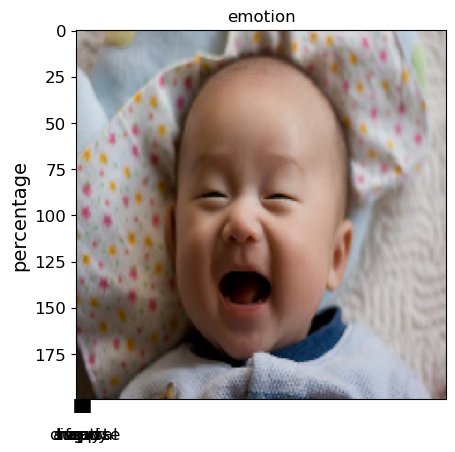

Expression Prediction: surprise


In [15]:
#save_fig("Expression_photo")

from skimage import io
img = image.load_img('C:/Users/BIT/Jupyter Notebook/handson-ml2-master/photo.jpg', grayscale=True, target_size=(48, 48))
show_img=image.load_img('C:/Users/BIT/Jupyter Notebook/handson-ml2-master/photo.jpg', grayscale=False, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
#print(custom[0])
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(show_img)
plt.show()

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i

print('Expression Prediction:',objects[ind])

In [16]:
from tkinter import *
import csv
import random
import pandas as pd
import numpy as np
import os

with open("C:/Users/BIT/Jupyter Notebook/handson-ml2-master/movies.csv", "r") as inFp :
     with open("C:/Users/BIT/Jupyter Notebook/handson-ml2-master/moviesSum2.csv", "w") as outFp:
        
        header = inFp.readline()
        header = header.strip()
        header_list= header.split(',')
        idx1 = header_list.index('movie_id')
        idx2 = header_list.index('title')
        idx3 = header_list.index('poster_path')
        idx4 = header_list.index('genres')
        idx5 = header_list.index('release_date')
        idx6 = header_list.index('vote_average')
        idx7 = header_list.index('overview')
        idx8 = header_list.index('feeling')
        header_list = [header_list[idx1], header_list[idx2], header_list[idx3],header_list[idx4], header_list[idx5], header_list[idx6],header_list[idx7], header_list[idx8]]
        header_str = ','.join(map(str, header_list))
        outFp.write(header_str + '\n')
        for inStr in inFp:
            inStr = inStr.strip()
            row_list = inStr.split(',')
            if str(row_list[idx8]) == objects[ind] :
                row_list = [row_list[idx1], row_list[idx2], row_list[idx3],row_list[idx4],row_list[idx5],row_list[idx6],row_list[idx7],row_list[idx8]]
                row_str = ','.join(map(str, row_list))
                outFp.write(row_str + '\n')

df = pd.read_csv('C:/Users/BIT/Jupyter Notebook/handson-ml2-master/moviesSum2.csv')
df = df.sample(frac=1)
df.head(5).to_csv('C:/Users/BIT/Jupyter Notebook/handson-ml2-master/moviesSum2.csv', index=False)

print('Save. OK~')

df.head(7)

Save. OK~


,movie_id,title,poster_path,genres,release_date,vote_average,overview,feeling
1,163839,The Black Sheep of Whitehall,/dqASaLG6ACSHTFOiHod2LrI6Zzi.jpg,Comedy,1942-02-23,10,A professor teaching at a correspondence schoo...,surprise
0,43147,Blessed Event,/pZpi8O4IDYJvKg4dNToje0KMZjh.jpg,Drama,1932-09-10,10,A New York gossip columnist (Lee Tracy) feuds ...,surprise


In [17]:
#pickie 감정을 한개씩만 받아오게 세팅
import pickle

test_file = open("test_pickle.pickle", "wb")
test_text = objects[ind]
pickle.dump(test_text, test_file)
test_file.close()

test_file = open("test_pickle.pickle", "rb")
text = pickle.load(test_file)
print(text)
test_file.close()

surprise


1/1 [==============================] - 0s 76ms/step


C:\Users\BIT\anaconda3\Lib\site-packages\keras\src\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


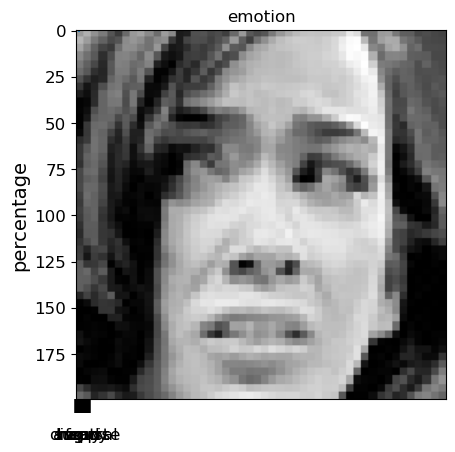

Expression Prediction: disgust
그림 저장: Expression_photo


<Figure size 640x480 with 0 Axes>

In [18]:
from skimage import io
img = image.load_img('C:/Users/BIT/Jupyter Notebook/handson-ml2-master/photo1.jpg', grayscale=True, target_size=(48, 48))
show_img=image.load_img('C:/Users/BIT/Jupyter Notebook/handson-ml2-master/photo1.jpg', grayscale=False, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
#print(custom[0])
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(show_img)
plt.show()

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i

print('Expression Prediction:',objects[ind])

save_fig("Expression_photo")

In [19]:
#notepad 감정을 계속 누적하여 받음
import sys

memo = sys.argv[2]
f = open('C:/Users/BIT/Jupyter Notebook/handson-ml2-master/notepad_test.txt', 'a')
f.write(objects[ind])
f.write('\n')
f.close()

1/1 [==============================] - 0s 82ms/step


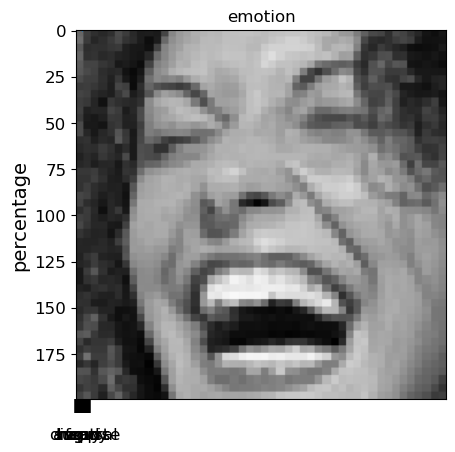

Expression Prediction: happy
그림 저장: Expression_photo


<Figure size 640x480 with 0 Axes>

In [20]:
from skimage import io
img = image.load_img('C:/Users/BIT/Jupyter Notebook/handson-ml2-master/photo2.jpg', grayscale=True, target_size=(48, 48))
show_img=image.load_img('C:/Users/BIT/Jupyter Notebook/handson-ml2-master/photo2.jpg', grayscale=False, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
#print(custom[0])
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(show_img)
plt.show()

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i

print('Expression Prediction:',objects[ind])

save_fig("Expression_photo")

In [21]:
import sys

memo = sys.argv[2]
f = open('C:/Users/BIT/Jupyter Notebook/handson-ml2-master/notepad_test.txt', 'a')
f.write(objects[ind])
f.write('\n')
f.close()

In [22]:
f = open("C:/Users/BIT/Jupyter Notebook/handson-ml2-master/notepad_test.txt", "rt")
memo = f.read()
f.close()

print(memo)

disgust
happy
disgust
happy

